In [1]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from collections import Counter

In [ ]:
path_prefix = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/"
resized_dir_path = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/resized_imgs/"
resized_valid_dir =  "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/resized_valid_imgs/"
norm_ab_dir = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm"
norm_ab_valid_dir = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm_valid"
orig_train_dir = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/"
orig_valid_dir = "/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/"

In [ ]:
train_img_path = pd.read_csv("/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/MURA-v1.1/train_image_paths.csv" , names=["img_path"])
valid_img_path = pd.read_csv("/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/MURA-v1.1/valid_image_paths.csv" , names=["img_path"])

In [ ]:
transform = T.Resize((150,150))
def resize_image():
  counter =0
  length = len(train_img_path["img_path"])
  for val in train_img_path["img_path"]:
    #img = Image.open(path_prefix + val)
    #resized_image = transform(img)
    #get directory path
    dir_list = val.split("/")
    dir = "/" + "/".join(dir_list[:-1])
    counter += 1
    print("Counter: " , counter , " out of " , length)
    print(resized_dir_path + val)
    break
    #if os.path.exists(resized_dir_path + dir):
    #  resized_image.save(resized_dir_path + val)
    #else:
    #  #make directory
    #  os.makedirs(resized_dir_path + dir)
    #  resized_image.save(resized_dir_path + val)
    
      
    

In [ ]:
training_df = pd.DataFrame(columns=["path" , "height" , "width" , "channels"])
train_height = []
train_width = []
train_path = []
train_channels = []

In [ ]:
def copy_files():
  counter =0
  length = len(train_img_path["img_path"])
  for val in train_img_path["img_path"]:
   
    dir_list = val.split("/")
    
    dir = "/" + "/".join(dir_list[:-1])
    file_name = "/" + "-".join(dir_list[2:6])
    
    counter += 1
    
    new_dir = orig_train_dir + val 
    #print(new_dir)
    
    if 'negative' in new_dir:
      shutil.copy(new_dir , norm_ab_dir +'/normal' + file_name)
      print(norm_ab_dir +'/normal' + file_name)
    else:
      print(norm_ab_dir +'/abnormal' + file_name)
      shutil.copy(new_dir , norm_ab_dir + '/abnormal' + file_name)
    print("Counter: " , counter , " out of " , length)
    

    

In [ ]:
copy_files()

In [ ]:

def copy_files_valid():
  counter =0
  length = len(valid_img_path["img_path"])
  for val in valid_img_path["img_path"]:
   
    dir_list = val.split("/")
    
    dir = "/" + "/".join(dir_list[:-1])
    file_name = "/" + "-".join(dir_list[2:6])
    
    counter += 1
    new_dir = orig_valid_dir + val 
    print(new_dir)
    
    if 'negative' in new_dir:
      shutil.copy(new_dir , norm_ab_valid_dir +'/normal' + file_name)
      print(norm_ab_valid_dir +'/normal' + file_name)
    else:
      print(norm_ab_valid_dir +'/abnormal' + file_name)
      shutil.copy(new_dir , norm_ab_valid_dir + '/abnormal' + file_name)
    print("Counter: " , counter , " out of " , length)
    
  
    
    

In [ ]:
copy_files_valid()

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm_valid/abnormal/XR_HUMERUS-patient11650-study1_positive-image2.png
Counter:  1531  out of  3197
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/MURA-v1.1/valid/XR_HUMERUS/patient11650/study1_positive/image3.png
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm_valid/abnormal/XR_HUMERUS-patient11650-study1_positive-image3.png
Counter:  1532  out of  3197
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/MURA-v1.1/valid/XR_HUMERUS/patient11651/study1_positive/image1.png
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm_valid/abnormal/XR_HUMERUS-patient11651-study1_positive-image1.png
Counter:  1533  out of  3197
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/MURA-v1.1/valid/XR_HUMERUS/patient11651/study1_positive/image2.png
/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm_valid/abnormal/XR_HUMER

In [ ]:
import os
dir_path_normal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/normal"
dir_path_abnormal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/abnormal"
paths = [dir_path_normal , dir_path_abnormal]
counter = 0
for path in paths:
    for file_name in os.listdir(path):
      print(counter)
      print(os.path.join(path, file_name))
      im = Image.open(os.path.join(path, file_name))
      train_path.append(file_name)
      train_channels.append(im.mode)
      train_height.append(im.height)
      train_width.append(im.width)
      print(im.size , im.mode)
      im.close()
      counter += 1

In [ ]:
import os
dir_path_normal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/normal"
dir_path_abnormal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/abnormal"
paths = [dir_path_abnormal , dir_path_normal]
counter = 0
for path in paths:
    for file_name in os.listdir(path):
      if counter <- 279:
        continue
      print(counter)
      print(os.path.join(path, file_name))
      im = Image.open(os.path.join(path, file_name))
      if(im.height != 512):
        #im.show()
        im_rot = im.rotate(angle = -90)
        #im_rot.show()
        im_rot.save(os.path.join(path, file_name))

      im.close()
      counter += 1
      

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
rot_df = pd.DataFrame(columns=["path" , "height" , "width" , "channels"])
rot_height = []
rot_width = []
rot_path = []
rot_channels = []
import os
dir_path_normal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/normal"
dir_path_abnormal = r"/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/abnormal"
paths = [dir_path_normal , dir_path_abnormal]
counter = 0
for path in paths:
    for file_name in os.listdir(path):
      print("Counter: ",counter, " out of 40005")
      print(os.path.join(path, file_name))
      im = Image.open(os.path.join(path, file_name))
      rot_path.append(file_name)
      rot_channels.append(im.mode)
      rot_height.append(im.height)
      rot_width.append(im.width)
      print(im.size , im.mode)
      im.close()
      counter += 1
rot_df['path'] = rot_path
rot_df['height'] = rot_height
rot_df['width'] = rot_width
rot_df['channels'] = rot_channels

In [ ]:
rot_df.head()

,path,height,width,channels
0,XR_HAND-patient10919-study1_negative-image2.png,415,512,RGB
1,XR_HAND-patient10920-study1_negative-image1.png,372,512,L
2,XR_HAND-patient10920-study1_negative-image2.png,372,512,L
3,XR_HAND-patient03111-study1_negative-image1.png,512,406,RGB
4,XR_HAND-patient03111-study1_negative-image2.png,512,406,RGB


In [ ]:
training_df['path'] = train_path
training_df['height'] = train_height
training_df['width'] = train_width
training_df['channels'] = train_channels

In [ ]:
training_df['channels'].value_counts()


L      24016
RGB    15989
Name: channels, dtype: int64

In [ ]:
training_df['height'].value_counts()

In [ ]:
training_df['width'].value_counts()

512    9368
406    6366
407    1901
379    1895
420    1620
       ... 
118       1
112       1
105       1
121       1
115       1
Name: width, Length: 410, dtype: int64

In [ ]:
training_df.isna().sum()

path        0
height      0
width       0
channels    0
dtype: int64

In [ ]:
len(training_df[(training_df['height']==512) | (training_df['width']==5)])

31634

In [ ]:
len(training_df[(training_df['width']!=512)  & (training_df['height']!=512) ])

0

In [ ]:
h_n0512 = training_df[training_df['height'] != 512]

In [ ]:
w_no512 = training_df[training_df['width'] != 512]

In [ ]:
h_n0512.describe()

,height,width
count,8371.000000,8371.0
mean,410.943854,512.0
std,50.905556,0.0
min,132.000000,512.0
25%,406.000000,512.0
50%,407.000000,512.0
75%,425.000000,512.0
max,511.000000,512.0


In [ ]:
w_no512.describe()

,height,width
count,30637.0,30637.000000
mean,512.0,365.035513
std,0.0,76.615793
min,512.0,89.000000
25%,512.0,324.000000
50%,512.0,405.000000
75%,512.0,407.000000
max,512.0,511.000000


In [ ]:
training_df.to_csv('/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/h_w_c.csv' , index = False)


In [3]:
training_df = pd.read_csv('/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/h_w_c.csv' )

In [4]:
training_df.head()

,path,height,width,channels
0,XR_HAND-patient10919-study1_negative-image2.png,415,512,RGB
1,XR_HAND-patient10920-study1_negative-image1.png,372,512,L
2,XR_HAND-patient10920-study1_negative-image2.png,372,512,L
3,XR_HAND-patient03111-study1_negative-image1.png,512,406,RGB
4,XR_HAND-patient03111-study1_negative-image2.png,512,406,RGB


(array([2.9000e+01, 8.2000e+01, 8.1000e+01, 6.9000e+01, 1.3600e+02,
        2.4200e+02, 9.4200e+02, 5.1800e+03, 7.7800e+02, 3.2466e+04]),
 array([132., 170., 208., 246., 284., 322., 360., 398., 436., 474., 512.]),
 <BarContainer object of 10 artists>)

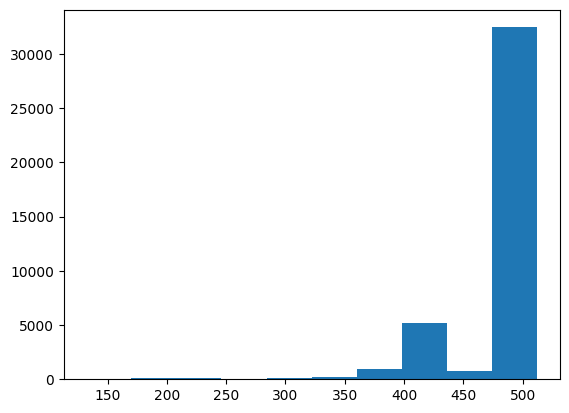

In [5]:

plt.hist(training_df['height'])

(array([   88.,   619.,  1311.,  1885.,  2435.,  2476.,  4425., 15073.,
         1307., 10386.]),
 array([ 89. , 131.3, 173.6, 215.9, 258.2, 300.5, 342.8, 385.1, 427.4,
        469.7, 512. ]),
 <BarContainer object of 10 artists>)

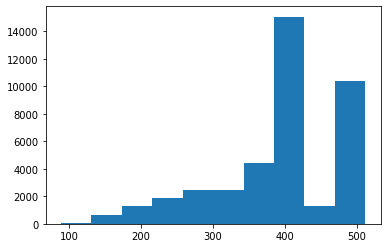

In [ ]:
plt.hist(training_df['width'])

(array([15989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24016.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

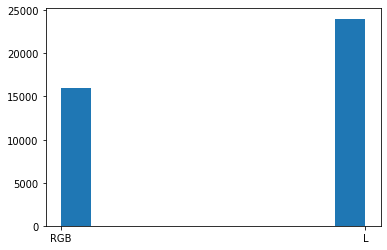

In [ ]:
plt.hist(training_df['channels'])

In [7]:
Counter(training_df['channels'])

Counter({'RGB': 15989, 'L': 24016})

In [ ]:
import os

# folder path
dir_path = r'/content/drive/MyDrive/Spring/506-AI/COLAB/Project/MURA/norm_abnorm/normal'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 23602


In [ ]:
copy_files_valid()

[]